In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
def func_to_fit(x, dev):
    return np.random.normal(loc = (3*x**3 - x**2 + 5*x - 3), scale = dev)

def func2(x):
    return np.exp(x/50)

200


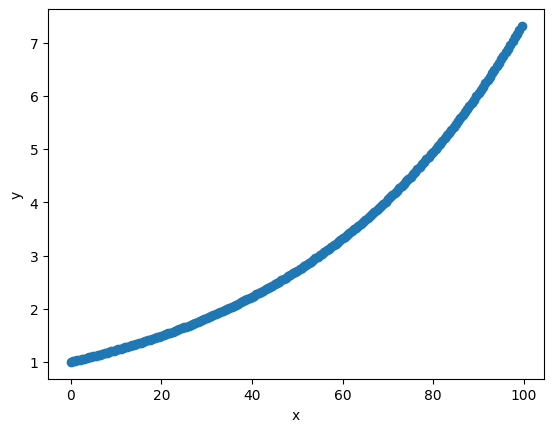

In [213]:
#Input data 

#training
x = np.arange(0,100,0.5)
xsize = len(x)
print(xsize)
y = func2(x)

plt.errorbar(x, y, yerr=None, fmt = 'o', linestyle='--', capsize=1)
plt.xlabel('x')
plt.ylabel('y')

#validation
xval = np.random.uniform(0,200,int(xsize/2))
yval = func2(xval)

In [227]:
number_of_layers = 4 #number of layers in the NN

def make_model():
    N=20
    input_la = keras.Input(shape=(1,)) #input layer
    model = keras.Sequential([input_la])
    model.add(layers.Dense(N,activation="relu",name="layer1"))
    model.add(layers.Dense(N,activation="tanh",name="layer2"))
    model.add(layers.Dense(N,activation="relu",name="layer3"))
    model.add(layers.Dense(N,activation="sigmoid",name="layer4"))
    model.add(layers.Dense(N,activation="sigmoid",name="layer5"))
    model.add(layers.Dense(1)) #output layer
    return model

4/4 [==============================] - 0s 2ms/step
Final Value loss:  0.0270451158285141


Text(0, 0.5, 'loss')

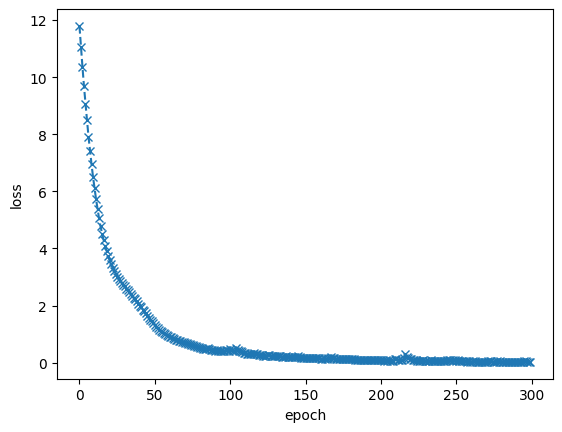

In [228]:
#Minimization
model = make_model()
model.compile(loss='mean_squared_error', optimizer='adam')
histo=model.fit(x, y, epochs=300, batch_size=64, verbose=0)
predictions = model.predict(xval)
print('Final Value loss: ',histo.history['loss'][len(histo.history['loss'])-1])
plt.errorbar(histo.epoch, histo.history['loss'], yerr=None, fmt = 'x', linestyle='--', capsize=1)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0.5, 0, 'x')

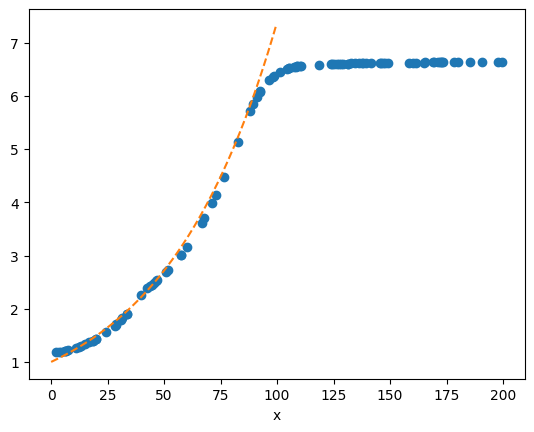

In [232]:
plt.errorbar(xval, predictions, yerr=None, fmt = 'o', capsize=1)
plt.errorbar(x, y, yerr=None, linestyle='--', capsize=1)
#plt.errorbar(xval, yval, yerr=None, fmt = 'o', capsize=1)
plt.xlabel('x')